<a href="https://colab.research.google.com/github/eisbetterthanpi/vision/blob/main/lat_long.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import requests


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Get OneMap Lat Long

In [ ]:
# df = pd.read_excel("property_sample.xlsx", engine='openpyxl')
# df = pd.read_excel("/content/drive/MyDrive/all_properties_cleaned.xlsx", engine='openpyxl')
df = pd.read_excel("/content/drive/MyDrive/properties_batch.xlsx", engine='openpyxl')
display(df)

,S/N,Filename,Original Property Address,Property Address Cleaned
0,1,03. 1 GUAN SOON AVE,1 GUAN SOON AVE,1 GUAN SOON AVE
1,2,04. 1A GUAN SOON AVE,1A GUAN SOON AVE,1A GUAN SOON AVE
2,3,02. 2 GUAN SOON AVE,2 GUAN SOON AVE,2 GUAN SOON AVE
3,4,02. 4 GUAN SOON AVE,4 GUAN SOON AVE,4 GUAN SOON AVE
4,5,05. 6 GUAN SOON AVE,6 GUAN SOON AVE,6 GUAN SOON AVE
...,...,...,...,...
71857,71858,05. 11 HOLLAND LINK #01-80,11 HOLLAND LINK #01-80,11 HOLLAND LINK #01-80
71858,71859,05. 11 HOLLAND LINK #01-81,11 HOLLAND LINK #01-81,11 HOLLAND LINK #01-81
71859,71860,05. 11 HOLLAND LINK #01-82,11 HOLLAND LINK #01-82,11 HOLLAND LINK #01-82
71860,71861,03. 48 NASSIM RD,48 NASSIM RD,48 NASSIM RD


In [ ]:
def get_coordinates(address):
    req = requests.get(('https://developers.onemap.sg/commonapi/search?'
                        'searchVal='+address+'&returnGeom=Y&getAddrDetails=Y&pageNum=1'))
    results_dict = eval(req.text)
    
    if len(results_dict['results'])>0:
        return results_dict['results'][0]['LATITUDE'], results_dict['results'][0]['LONGITUDE']
    else:
        pass

In [ ]:
start,end = 0, 2000

address_list = list(df['Property Address Cleaned'])
coordinates_list= []
count = 0
failed_count = 0

for address in address_list:
    try:
        if len(get_coordinates(address))>0:
            count = count + 1
            print('Extracting',count,'out of',len(address_list),'addresses')
            coordinates_list.append(get_coordinates(address))
            df.at[4, 'B'] = 10 # df.iat[4, 2] 
    except:
        count = count + 1           
        failed_count = failed_count + 1
        print('Failed to extract',count,'out of',len(address_list),'addresses')
        coordinates_list.append(None)
        
print('Total Number of Addresses With No Coordinates',failed_count)

Extracting 1 out of 71862 addresses
Extracting 2 out of 71862 addresses
Extracting 3 out of 71862 addresses
Extracting 4 out of 71862 addresses
Extracting 5 out of 71862 addresses
Extracting 6 out of 71862 addresses
Extracting 7 out of 71862 addresses
Extracting 8 out of 71862 addresses
Extracting 9 out of 71862 addresses
Extracting 10 out of 71862 addresses
Extracting 11 out of 71862 addresses
Extracting 12 out of 71862 addresses
Extracting 13 out of 71862 addresses
Extracting 14 out of 71862 addresses
Extracting 15 out of 71862 addresses
Extracting 16 out of 71862 addresses
Extracting 17 out of 71862 addresses
Extracting 18 out of 71862 addresses
Extracting 19 out of 71862 addresses
Extracting 20 out of 71862 addresses
Extracting 21 out of 71862 addresses
Extracting 22 out of 71862 addresses
Extracting 23 out of 71862 addresses
Extracting 24 out of 71862 addresses
Extracting 25 out of 71862 addresses
Extracting 26 out of 71862 addresses
Extracting 27 out of 71862 addresses
Extracting

In [ ]:
df_coordinates = pd.DataFrame(coordinates_list)
df_combined = df.join(df_coordinates)
df_combined = df_combined.rename(columns={0:'Latitude', 1:'Longitude'})
df_combined


In [ ]:
# df_combined.to_excel('.\property_sample_lat_lon.xlsx', index=False)
# df_combined.to_excel('.\property_all_lat_lon.xlsx', index=False)
df_combined.to_excel('/content/drive/MyDrive/property_all_lat_lon.xlsx', index=False)


## Test Google Street View

In [ ]:
meta_base = 'https://maps.googleapis.com/maps/api/streetview/metadata?'
pic_base = 'https://maps.googleapis.com/maps/api/streetview?'

# Setup new account and input api_key
api_key = 'xxxx'

# Input sample lat long to view image
location = '1.33781554129955, 103.784601205009'

# define the params for the metadata request
meta_params = {'key': api_key,
               'location': location}

# define the params for the picture request
pic_params = {'key': api_key,
              'location': location,
              'size': "600x400",
              'source': "outdoor"}

In [ ]:
meta_response = requests.get(meta_base, params=meta_params)
meta_response.json()

{'status': 'ZERO_RESULTS'}

In [ ]:
pic_response = requests.get(pic_base, params=pic_params)
for key, value in pic_response.headers.items():
    print(f"{key}: {value}")

Content-Type: image/jpeg
Date: Wed, 11 Jan 2023 05:58:22 GMT
Expires: Thu, 12 Jan 2023 05:58:22 GMT
Cache-Control: public, max-age=86400
Access-Control-Allow-Origin: *
Server: scaffolding on HTTPServer2
Content-Length: 84053
X-XSS-Protection: 0
X-Frame-Options: SAMEORIGIN
Server-Timing: gfet4t7; dur=185
Alt-Svc: h3=":443"; ma=2592000,h3-29=":443"; ma=2592000,h3-Q050=":443"; ma=2592000,h3-Q046=":443"; ma=2592000,h3-Q043=":443"; ma=2592000,quic=":443"; ma=2592000; v="46,43"


In [ ]:
with open('10_LI_HWAN_VIEW.jpg', 'wb') as file:
    file.write(pic_response.content)
# remember to close the response connection to the API
pic_response.close()

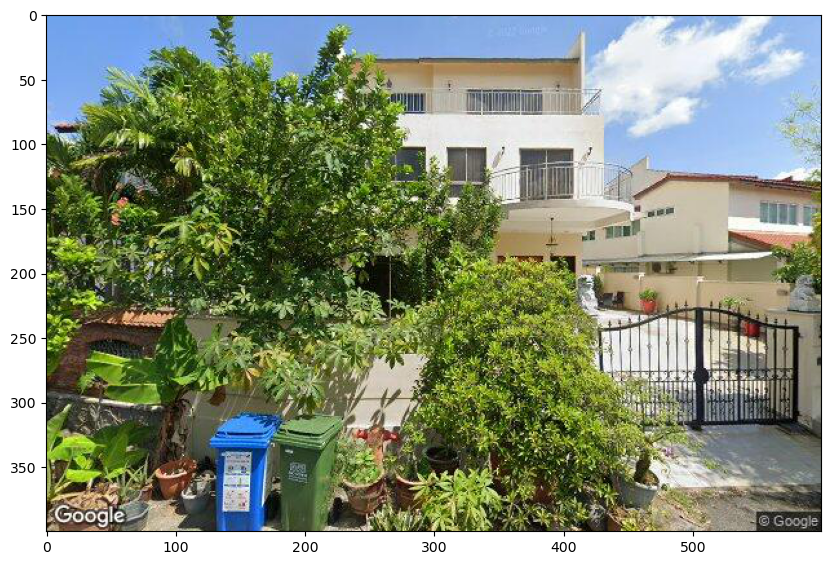

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 10))
img=mpimg.imread('10_LI_HWAN_VIEW.jpg')
imgplot = plt.imshow(img)
plt.show()

## Get Google Street View

In [ ]:
df_lat_lon = pd.read_excel("property_sample_lat_lon.xlsx", engine='openpyxl')
df_lat_lon_not_null = df_lat_lon[~df_lat_lon['Latitude'].isnull()]
df_lat_lon_not_null.head()

,S/N,Filename,Property Address Cleaned,Latitude,Longitude
0,18910,01. 11 JLN ASAS,11 JLN ASAS,1.357983,103.768297
1,31170,01. 9 JLN KELICHAP,9 JLN KELICHAP,1.346730,103.881220
2,59554,01. 76 CEYLON RD,76 CEYLON RD,1.307956,103.901300
3,17789,01. 38 PENSHURST PL,38 PENSHURST PL,1.363830,103.864369
4,53806,01. 2 HOLLAND GR DR,2 HOLLAND GR DR,1.315447,103.782465


In [ ]:
df_lat_lon_not_null_copy = df_lat_lon_not_null.copy()
df_lat_lon_not_null_copy['Latitude_Longitude'] = df_lat_lon_not_null_copy ['Latitude'].apply(str) + ', ' \
                                                 + df_lat_lon_not_null_copy ['Longitude'].apply(str)
df_lat_lon_not_null_copy.head()

,S/N,Filename,Property Address Cleaned,Latitude,Longitude,Latitude_Longitude
0,18910,01. 11 JLN ASAS,11 JLN ASAS,1.357983,103.768297,"1.3579826757604299, 103.76829705645399"
1,31170,01. 9 JLN KELICHAP,9 JLN KELICHAP,1.346730,103.881220,"1.3467298197494098, 103.88122009810301"
2,59554,01. 76 CEYLON RD,76 CEYLON RD,1.307956,103.901300,"1.307955793955, 103.90129967665001"
3,17789,01. 38 PENSHURST PL,38 PENSHURST PL,1.363830,103.864369,"1.36382966148179, 103.86436944736299"
4,53806,01. 2 HOLLAND GR DR,2 HOLLAND GR DR,1.315447,103.782465,"1.31544652456745, 103.78246524945801"


In [ ]:
filename_list = list(df_lat_lon_not_null_copy['Filename'])
coordinates_list = list(df_lat_lon_not_null_copy['Latitude_Longitude'])
print(filename_list[:5])
print(coordinates_list[:5])

['01. 11 JLN ASAS', '01. 9 JLN KELICHAP', '01. 76 CEYLON RD', '01. 38 PENSHURST PL', '01. 2 HOLLAND GR DR']
['1.3579826757604299, 103.76829705645399', '1.3467298197494098, 103.88122009810301', '1.307955793955, 103.90129967665001', '1.36382966148179, 103.86436944736299', '1.31544652456745, 103.78246524945801']


In [ ]:
class GoogleStreetView(object):
    def __init__(self, api_key, size="640x400", source="outdoor"):
        self._key = api_key
        self.size = size
        self.source = source

    def get_pic(self, lat_long):
        """
        Method to query the StreetView picture
        """
        self._pic_params = dict(key=self._key,
                                location=lat_long,
                                size=self.size,
                                source=self.source)
        
        self._pic_response = requests.get(
            'https://maps.googleapis.com/maps/api/streetview?',
            params=self._pic_params)
        if self._pic_response.ok:
            return self._pic_response.content
        
    def get_meta(self, lat_long):
        """
        Method to query the metadata of the address
        """
        self._meta_params = dict(key=self._key,
                                 location=lat_long)
            
        self._meta_response = requests.get(
            'https://maps.googleapis.com/maps/api/streetview/metadata?',
            params=self._meta_params)
        self.meta_info = self._meta_response.json()
        
        return self.meta_info

In [ ]:
google_street_view = GoogleStreetView(api_key=api_key)

for filename, lat_long in zip(filename_list[775:], coordinates_list[775:]):
    file_dir = Path(Path.cwd(), 'google_street_view', filename[:2])    
    
    meta_info = google_street_view.get_meta(lat_long)
    
    if meta_info['status'] != 'OK':
        print(f'Failed to obtain {filename}')
        continue
        
    meta_dir = file_dir/(filename + ' ' + meta_info['date'] + '.json')
    pic_dir = file_dir/(filename + ' ' + meta_info['date'] + '.jpg')   
    pic_content = google_street_view.get_pic(lat_long)
        
    with open(meta_dir, 'w') as meta_file:
        json.dump(meta_info, meta_file)
            
    with open(pic_dir, 'wb') as pic_file:            
        pic_file.write(pic_content)

# Failed to obtain 2B DENHAM CL

Failed to obtain 01. 5 OXLEY RISE
Failed to obtain 01. 75 JLN REDOP
Failed to obtain 01. 69 SOMMERVILLE RD
Failed to obtain 01. 21 JLN NURI
Failed to obtain 02. 9A BRIZAY PK
Failed to obtain 02. 77 SOMMERVILLE RD
Failed to obtain 02. 11 BRIZAY PK
Failed to obtain 02. 9C BRIZAY PK
Failed to obtain 02. 130A JLN DERMAWAN
Failed to obtain 02. 130B JLN DERMAWAN
Failed to obtain 02. 51A HOLLAND RD
Failed to obtain 02. 14 KOVAN RD
Failed to obtain 02. 124 CORONATION RD WEST
Failed to obtain 02. 55 SOMMERVILLE RD
Failed to obtain 02. 67 SOMMERVILLE RD
Failed to obtain 02. 51 THOMSON WLK
Failed to obtain 02. 32 LOR PISANG BATU
Failed to obtain 02. 3B SWETTENHAM RD
Failed to obtain 03. 39 LENGKOK MERAK
Failed to obtain 03. 2A CLUNY RD
Failed to obtain 03. 48A DALVEY RD
Failed to obtain 03. 95 UP CHANGI RD EAST
Failed to obtain 03. 53 UP CHANGI RD EAST
Failed to obtain 03. 4 PEIRCE DR
Failed to obtain 03. 61 SOMMERVILLE RD
Failed to obtain 03. 20 CROUCHER RD
Failed to obtain 04. 8 MILTONIA CLOSE
